# Basics of network science (Network building blocks)

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

There are several python librariries that can be used to build and analyze networks. The most popular one is `networkx`. Other options are:
* [igraph](https://igraph.org/python/) - a library for creating and analyzing complex networks, written in C and Python.
* [graph-tool](https://graph-tool.skewed.de/) - a Python module for manipulation and statistical analysis of graphs (a.k.a. networks).
* [snap](http://snap.stanford.edu/snappy/index.html) - a general purpose, high performance system for analysis and manipulation of large networks.

You can also download [Gephi](https://gephi.org/) which is a visualization and exploration software for all kinds of graphs and networks. Gephi is open-source and free.

## Building blocks

Let's create an empty graph

In [3]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


DiGraph with 4 nodes and 4 edges


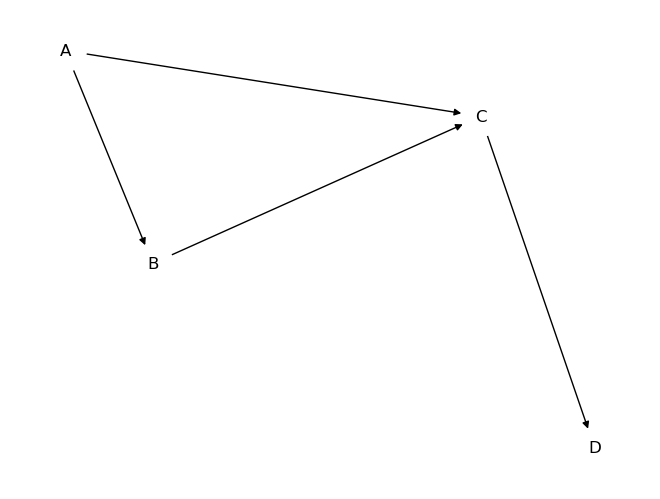

In [17]:
G = nx.DiGraph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), ])
nx.draw(G, node_size=800, node_color="white", with_labels=True)
print(G)

In [24]:
G

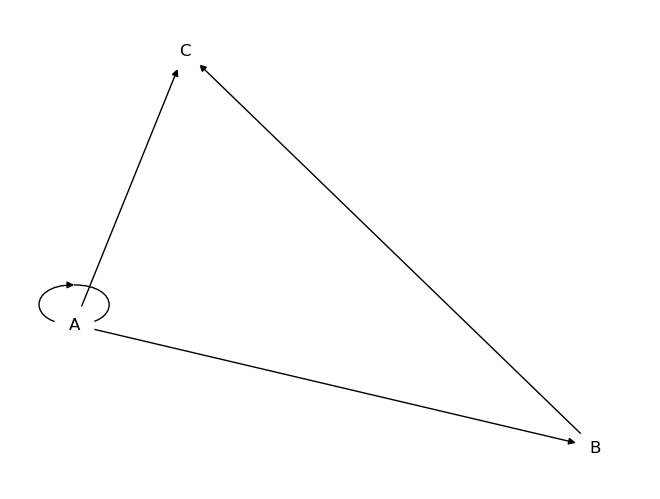

In [25]:
D = nx.DiGraph()
D.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("A", "A")])
nx.draw(D, node_size=800, node_color="white", with_labels=True)

OK, so these are pretty dull graphs. Networkx has a lot of built-in functions to generate more interesting graphs. For example, the `barabasi_albert_graph` function generates a scale-free graph based on the Barabási–Albert model.

In [29]:
[a for a in dir(nx) if a.endswith("graph")]

['LCF_graph',
 'LFR_benchmark_graph',
 'adjacency_graph',
 'barabasi_albert_graph',
 'barbell_graph',
 'binomial_graph',
 'bull_graph',
 'caveman_graph',
 'chordal_cycle_graph',
 'chvatal_graph',
 'circulant_graph',
 'circular_ladder_graph',
 'complete_bipartite_graph',
 'complete_graph',
 'complete_multipartite_graph',
 'complete_to_chordal_graph',
 'connected_caveman_graph',
 'connected_watts_strogatz_graph',
 'cubical_graph',
 'cycle_graph',
 'cytoscape_graph',
 'davis_southern_women_graph',
 'dense_gnm_random_graph',
 'desargues_graph',
 'diamond_graph',
 'digraph',
 'directed_havel_hakimi_graph',
 'directed_joint_degree_graph',
 'dodecahedral_graph',
 'dorogovtsev_goltsev_mendes_graph',
 'dual_barabasi_albert_graph',
 'duplication_divergence_graph',
 'edge_subgraph',
 'ego_graph',
 'empty_graph',
 'erdos_renyi_graph',
 'expected_degree_graph',
 'extended_barabasi_albert_graph',
 'fast_gnp_random_graph',
 'florentine_families_graph',
 'frucht_graph',
 'gaussian_random_partition_gra

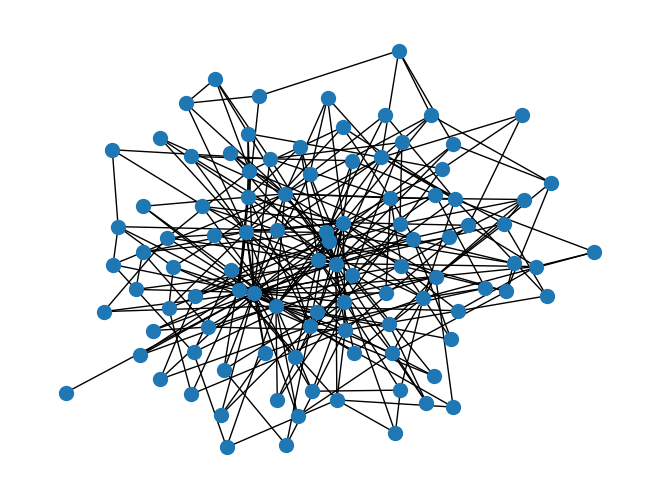

In [31]:
BA = nx.barabasi_albert_graph(100, 3)
nx.draw(BA, node_size=100)

You'll notice that the node positions are random. 

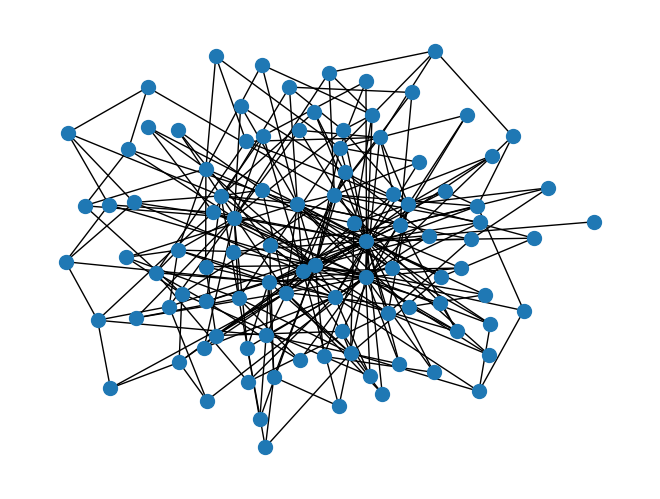

In [32]:
nx.draw(BA, node_size=100, pos=nx.spring_layout(BA))

Positioning the nodes using a layout algorithm makes the graph more readable. Networkx has several layout algorithms, such as:
* `circular_layout` - positions nodes on a circle
* `random_layout` - positions nodes randomly
* `shell_layout` - positions nodes in concentric circles
* `spring_layout` - positions nodes using Fruchterman-Reingold force-directed algorithm
* `spectral_layout` - positions nodes using the eigenvectors of the graph Laplacian
* `planar_layout` - positions nodes without edge crossings
and more

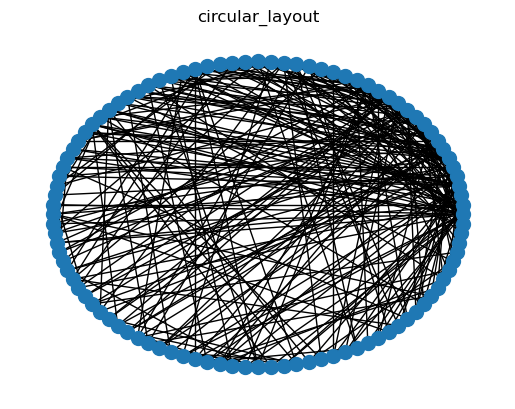

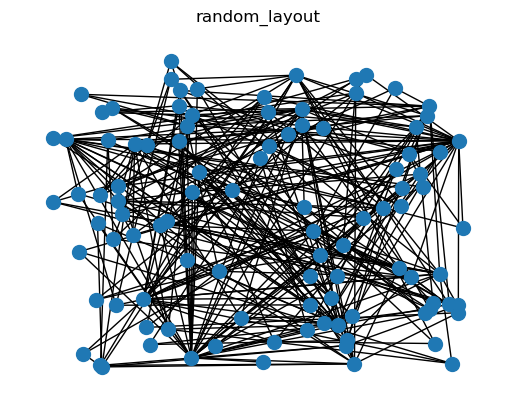

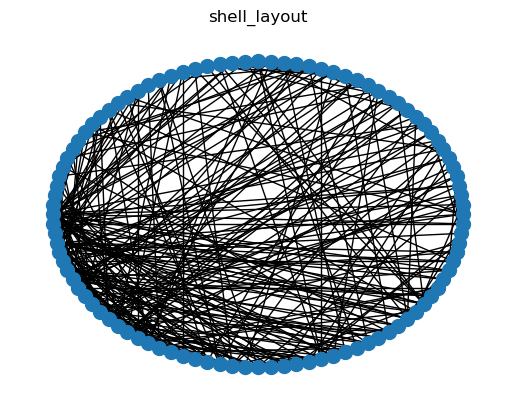

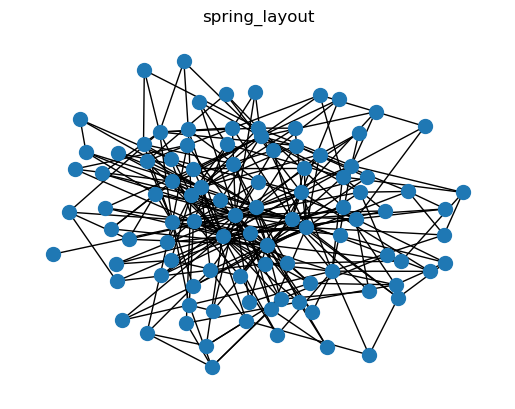

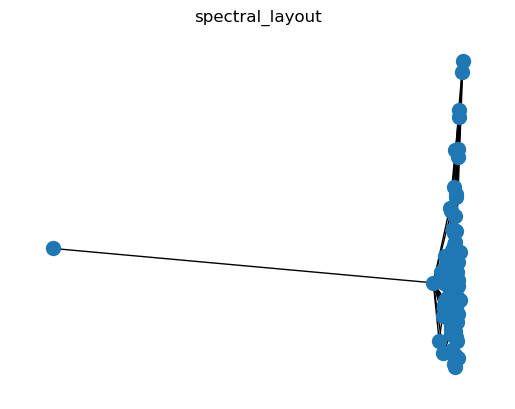

In [34]:
layouts = [
    nx.circular_layout,
    nx.random_layout,
    nx.shell_layout,
    nx.spring_layout,
    nx.spectral_layout,
]
for layout in layouts:
    fig, ax = plt.subplots()
    nx.draw(BA, node_size=100, pos=layout(BA), ax=ax)
    ax.set_title(layout.__name__)

Let's load a (sort-of) real-world network. The file `grays_anatomy.csv` contains a list of characters from the TV show Grey's Anatomy and the relationships between them. The file is in CSV format, with the first column containing the source node, the second column containing the target node, and the third column containing the weight of the edge.

In [35]:
df_ga = pd.read_csv("./data/greys_anatomy.csv")
df_ga

,from,from_gender,to,to_gender,seriousness,is_cheat
0,lexi,F,sloan,M,7,no
1,lexi,F,karev,M,3,no
2,owen,M,yang,F,8,no
3,owen,M,altman,F,4,yes
4,sloan,M,torres,F,2,no
5,sloan,M,altman,F,3,yes
6,torres,F,arizona,F,9,no
7,torres,F,karev,M,2,no
8,derek,M,grey,F,10,no
9,karev,M,izzie,F,8,no


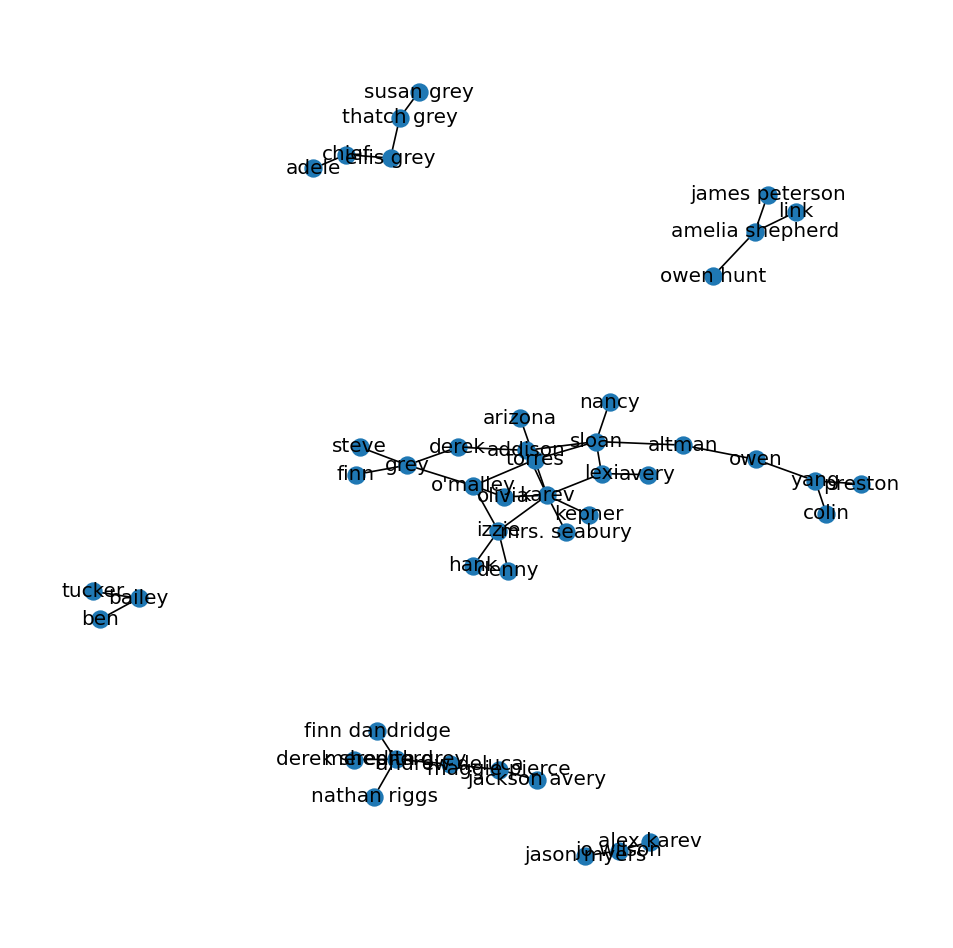

In [37]:
fig, ax = plt.subplots(dpi=120, figsize=(10, 10))
GA = nx.from_pandas_edgelist(df_ga, source="from", target="to")
nx.draw(GA, node_size=100, pos=nx.spring_layout(GA), with_labels=True)

## Node, edge and graph characteristics

### Node characteristics

When analyzing graphs, we have many ways to describe the nodes. The basic ones are:

* Degree - the number of edges connected to the node
* In-degree - the number of edges coming into the node (for directed graphs)
* Out-degree - the number of edges going out of the node (for directed graphs)

Later on, we will see more advanced node characteristics, such as centrality measures.

In [39]:
degrees = pd.Series(dict(GA.degree())).sort_values(ascending=False)
degrees

karev              7
sloan              5
meredith grey      4
grey               4
o'malley           4
torres             4
izzie              4
amelia shepherd    3
lexi               3
addison            3
yang               3
olivia             2
owen               2
bailey             2
thatch grey        2
ellis grey         2
chief              2
derek              2
maggie pierce      2
andrew deluca      2
jo wilson          2
altman             2
james peterson     1
alex karev         1
avery              1
jackson avery      1
owen hunt          1
nathan riggs       1
finn dandridge     1
derek shepherd     1
link               1
susan grey         1
ben                1
steve              1
finn               1
denny              1
hank               1
tucker             1
adele              1
mrs. seabury       1
nancy              1
kepner             1
preston            1
colin              1
arizona            1
jason myers        1
dtype: int64

Let's visualize the degree of each node in the Grey's Anatomy network

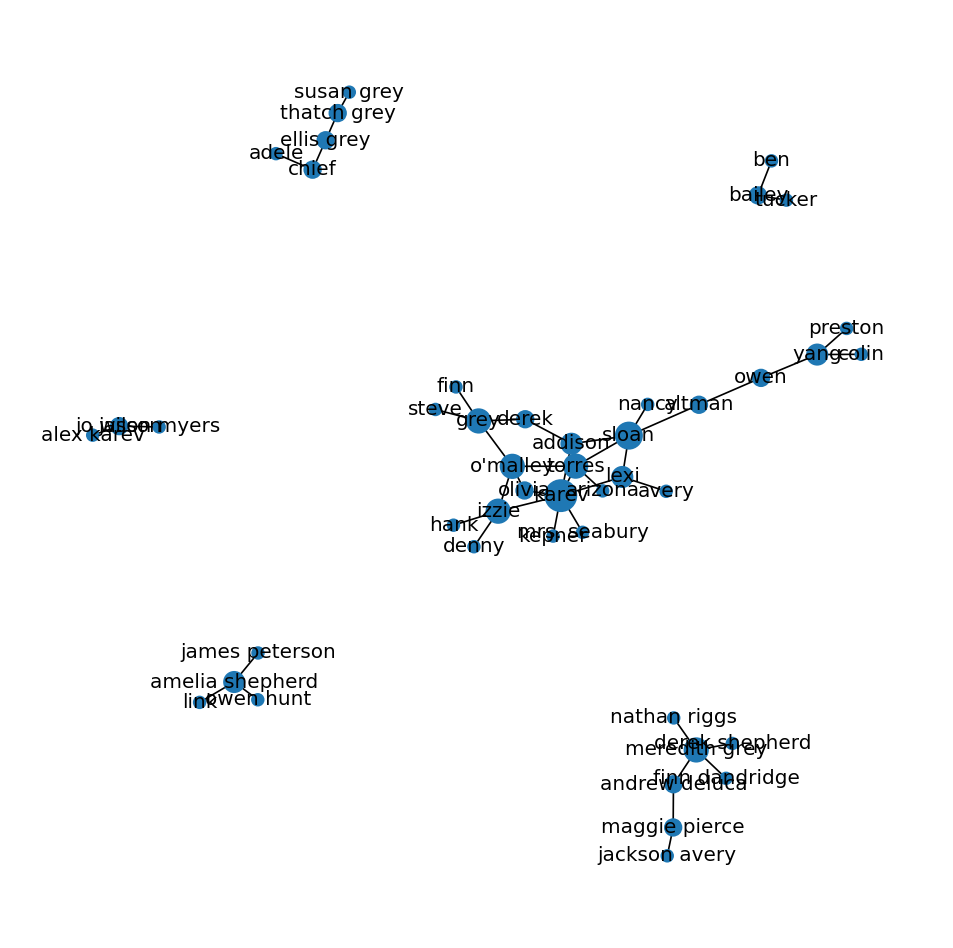

In [41]:
fig, ax = plt.subplots(dpi=120, figsize=(10, 10))
nx.draw(
    GA,
    node_size=[GA.degree(node) * 50 for node in GA.nodes()],
    pos=nx.spring_layout(GA),
    with_labels=True,
    ax=ax
)

From time to time, we may assign attributes to the nodes. For example, our data contains the gender of each character in the `from_gender` and `to_gender` columns. We can add this information to the graph.

In [42]:
genders = dict()
for _, row in df_ga.iterrows():
    genders[row["from"]] = row["from_gender"]
    genders[row["to"]] = row["to_gender"]
# assign the gender to the nodes
nx.set_node_attributes(GA, genders, "gender")
gender_colors = {"M": "#ADD8E6", "F": "#FFB6C1"}  # light blue  # light pink
node_colors = [gender_colors[GA.nodes[node]["gender"]] for node in GA.nodes()]

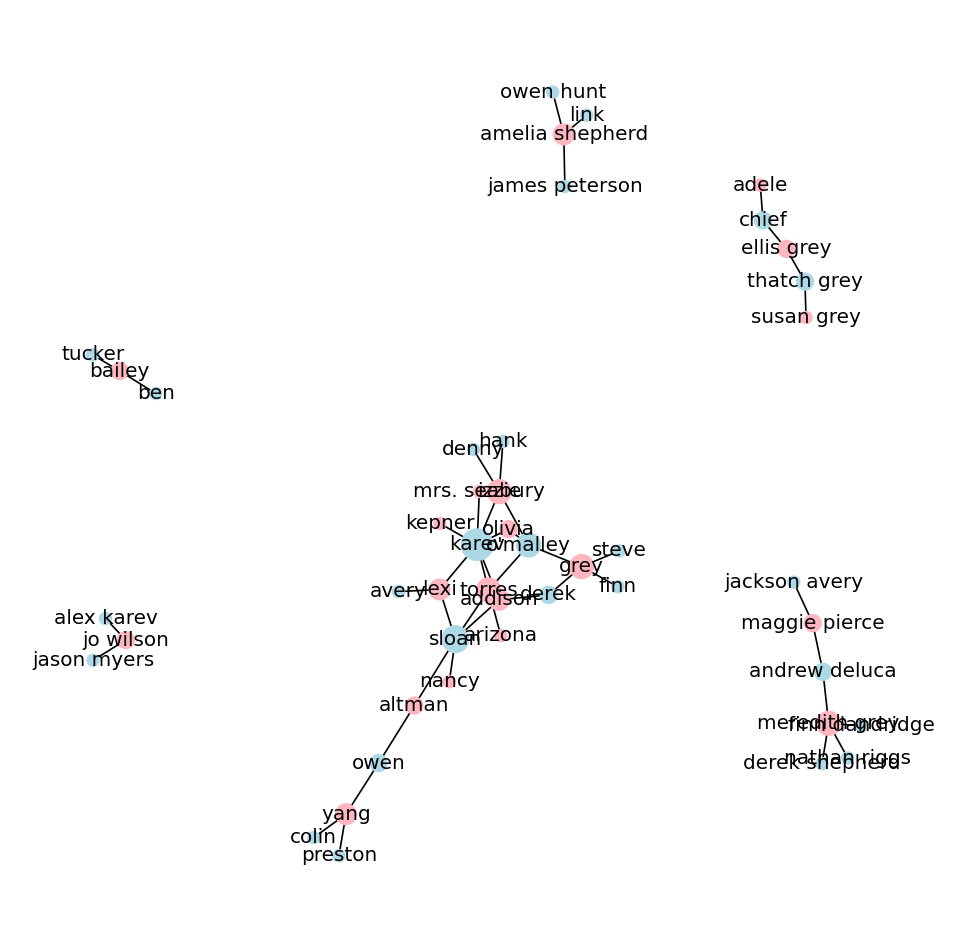

In [44]:
fig, ax = plt.subplots(dpi=120, figsize=(10, 10))
nx.draw(
    GA,
    node_size=[GA.degree(node) * 50 for node in GA.nodes()],
    node_color=node_colors,
    pos=nx.spring_layout(GA),
    with_labels=True, ax=ax
)

## Edge attributes

We can also carry attributes on the edges. For example, we can add the weight of the edge to the graph.
Later on, we will see more advanced edge characteristics, such as edge betweenness, edge closeness, and edge clustering.

In [45]:
GA = nx.from_pandas_edgelist(df_ga, source="from", target="to", edge_attr=["seriousness", 'is_cheat'])

In [46]:
cheat_colors = {
    'yes': '#FFA07A',  # light salmon
    'no': '#98FB98'    # pale green
}
edge_colors = [cheat_colors[GA.edges[edge]["is_cheat"]] for edge in GA.edges()]

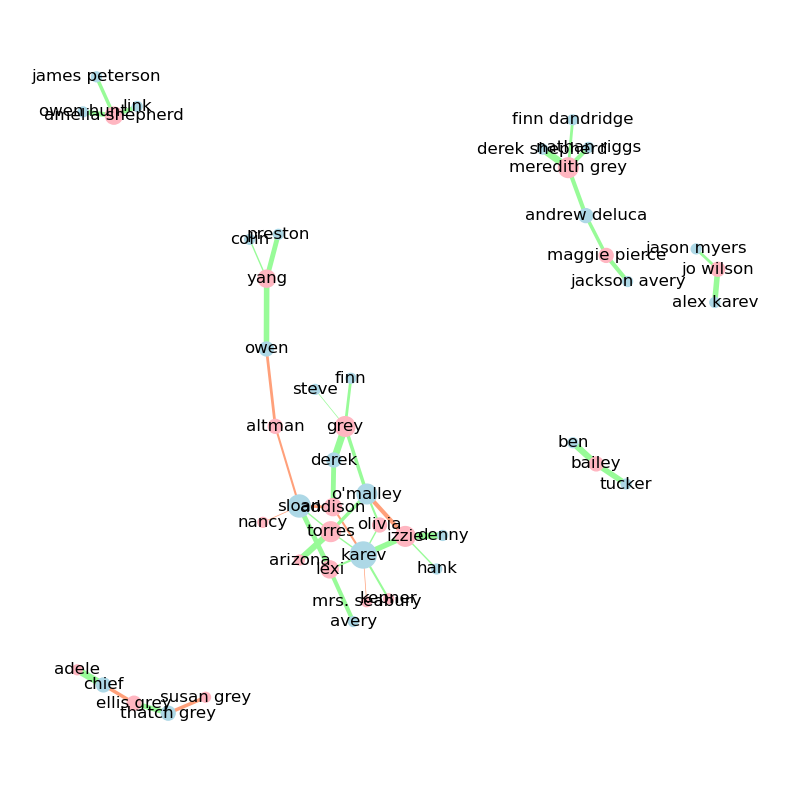

In [47]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
nx.draw(
    GA,
    node_size=[GA.degree(node) * 50 for node in GA.nodes()],
    node_color=node_colors,
    width=[GA.edges[edge]["seriousness"] * 0.5 for edge in GA.edges()],
    pos = nx.spring_layout(GA),
    edge_color=edge_colors,
    with_labels=True,
    ax=ax
)

## Graph characteristics

We saw that we can characterize the nodes and edges of a graph. We can also describe the graph as a whole. Some of the basic graph characteristics are:
* Number of nodes
* Number of edges
* Density - the ratio of the **actual** number of edges to the number of **theoretically** possible edges
* Diameter - the longest shortest path between any two nodes (we'll talk about shortest paths later)
* Degree distribution - the distribution of the degrees of the nodes in the graph

In [48]:
def graph_summary(G):
    ret = dict()
    ret["Number of nodes"] = G.number_of_nodes()
    ret["Number of edges"] = G.number_of_edges()
    ret["Density"] = nx.density(G)
    ret["Diameter"] = nx.diameter(G) if nx.is_connected(G) else "Graph is not connected"
    return ret
print(graph_summary(GA))

{'Number of nodes': 46, 'Number of edges': 45, 'Density': 0.043478260869565216, 'Diameter': 'Graph is not connected'}


{'Number of nodes': 24, 'Number of edges': 28, 'Density': 0.10144927536231885, 'Diameter': 8}


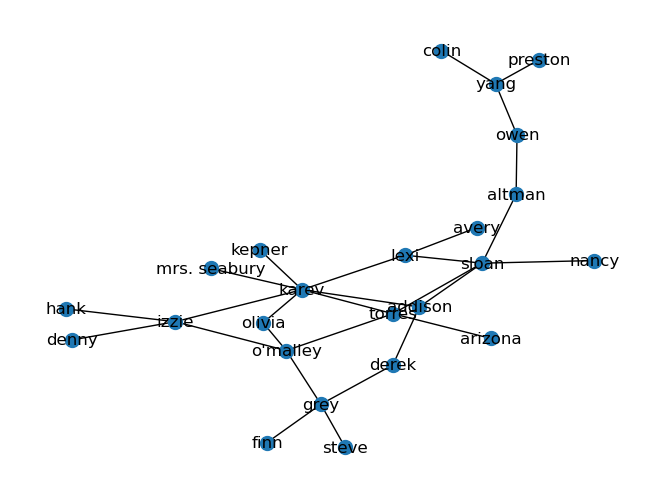

In [50]:
giant_component = max(nx.connected_components(GA), key=len)
GA_giant = GA.subgraph(giant_component)
nx.draw(GA_giant, node_size=100, pos=nx.spring_layout(GA_giant), with_labels=True)
print(graph_summary(GA_giant))

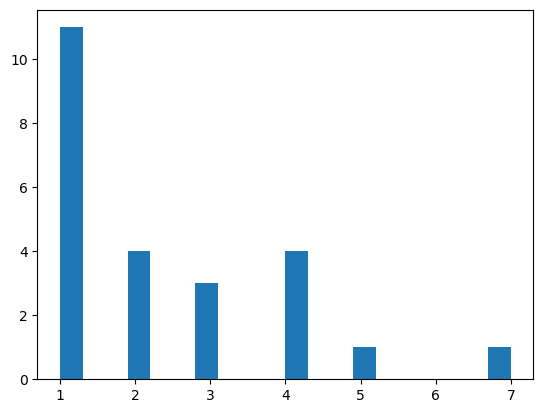

In [52]:
degrees = pd.Series(dict(GA_giant.degree())).sort_values(ascending=False)
plt.hist(degrees, bins=20);

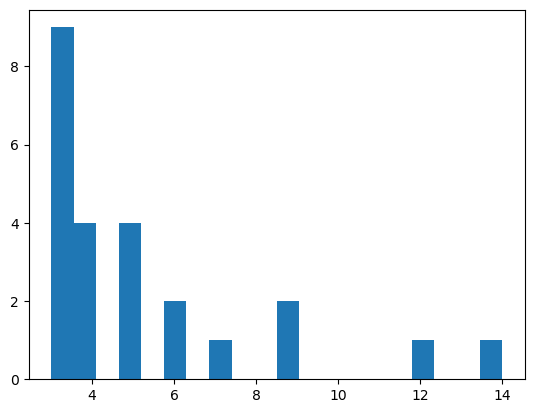

In [56]:
barabasi_albert = nx.barabasi_albert_graph(len(giant_component), 3)
degrees = pd.Series(dict(barabasi_albert.degree())).sort_values(ascending=False)
plt.hist(degrees, bins=20);